In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
file_path = 'logistic_regression_dataset.csv'

data = pd.read_csv(file_path)

data = data.drop_duplicates()
data = data.dropna()
print(data.head())

   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   
5   5   61        3.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   TenYearCHD  
1         0.0  
2         0.0  
3         1.0 

In [26]:
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['is_smoking'] = data['is_smoking'].map({'NO': 0, 'YES': 1})

In [19]:

data['is_smoking']

1       0
2       1
3       1
4       1
5       0
       ..
3384    0
3385    0
3386    0
3387    1
3389    0
Name: is_smoking, Length: 2927, dtype: int64

In [15]:
data.isnull().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

In [23]:
#1/
X = data.drop(columns=['id', 'TenYearCHD'])  # Drop id and TenYearCHD columns
y = data['TenYearCHD']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8481228668941979


Accuracy: 0.8481228668941979


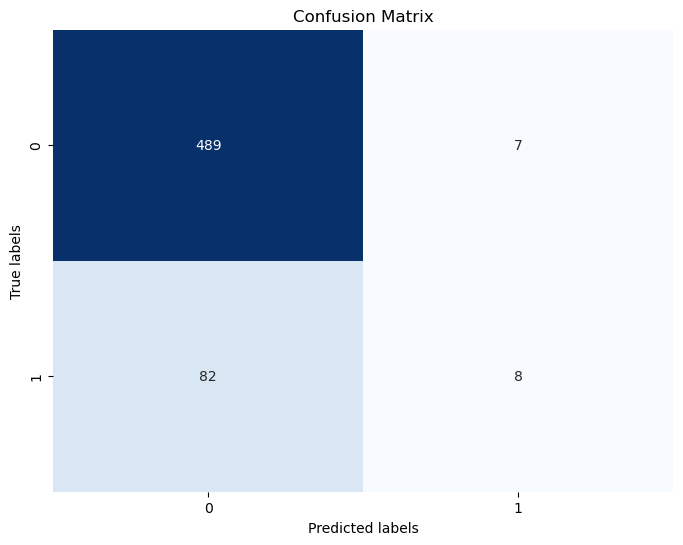

In [27]:
#2/
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


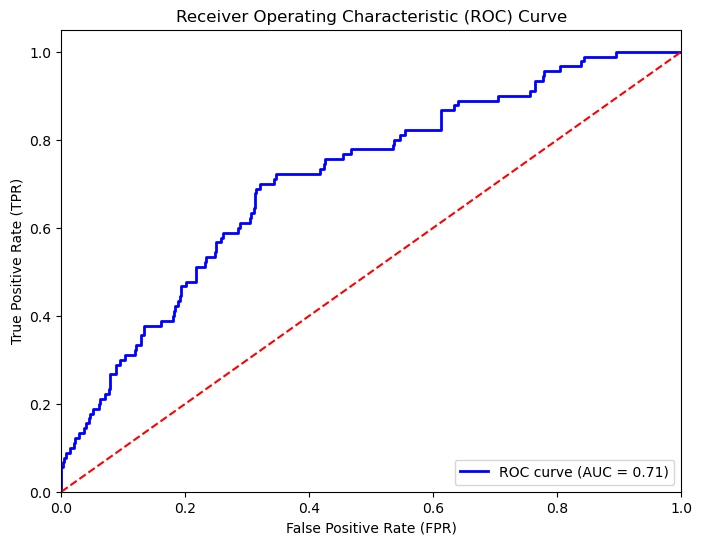

In [28]:
#3
predictions = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
